# ECG_EYE_EEG_%Evolution

### Importing libraries

In [1]:
import pandas as pd

from my_defs import (create_datasets, discriminate_target_association,
                     encoding_one_hot, normalize, predict, generate_samples, explore_dataset)

### Dataset exploration

In [2]:
data = pd.read_excel("ECG + EYE + EEG.xlsx", "ECG EYE EEG %Evolution")
data

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
0,12FM,65.6,2,1,0,3,1,Travaux_2,1,Manger,161,0,1,0,1,1.70009,3.44554,30.982388,1,15.698274,0,3.048080,1,0,0,0,0,1,1,0,1,1,1,1.906000,698.228000,85.932000,36.479000,12.426000,0.000000,5.964000,125.0000,8.777000,50.663000,0.173000,37.937000,62.063000,1.636000,3.971215,-7.012566,-1.658986,-2.483723,-3.059318,-2.291769,-3.739754,-4.003955,-3.497409,18.421053,22.301459,12.539110,21.541950,23.507463,23.658831,23.252859,17.062982,19.183286,16.623628,30.025171,15.203762,5.852926,13.664250,10.324061,9.620183,10.507778,4.648391,6.991150,3.916293,30.270270,-5.691476,-20.178042,-13.350785,-14.651848,-15.080751,-14.791521,-14.435760,-15.431520,-14.077190,13.100437,-2.239363,-8.227971,-4.495317,-5.046481,-5.852309,-4.479309,-7.982792,-8.442004,-7.874970,7.380397,13.090696,11.346055,8.009354,3.089270,-61.756098,-4.683536,-8.546668,24.428391,-1.620956,-3.128881,4.660437,-29.672270,-95.266819,-81.507550,-95.843167,-81.567306,-96.258591,-94.878195
1,12FM,65.6,2,1,0,6,5,Météo,2,Lecture,224,0,1,2,0,1.95012,NaN,47.246379,1,5.535166,1,0.181597,0,0,0,0,0,0,1,0,0,1,0,2.276000,777.811000,77.140000,22.495000,16.473000,0.680000,4.625000,78.1250,11.647000,29.405000,0.396000,52.300000,47.700000,0.912000,49.706823,44.183218,42.903226,41.138172,44.208314,39.650074,37.935451,35.491844,38.056995,66.811146,73.322528,72.587244,78.316327,66.386816,87.040386,55.050826,59.865039,63.184552,59.038089,82.847896,66.269592,80.040020,74.288901,51.964439,70.113668,42.060464,46.692491,51.297935,45.590433,83.639640,37.368014,33.531157,36.365620,20.254026,32.496726,13.207547,21.104055,20.661351,21.301336,60.262009,83.801941,80.684692,73.277836,61.221780,74.888274,53.910869,67.710325,65.385495,68.451660,110.005834,58.409158,62.403301,46.506869,10.850298,-74.439024,-35.957885,5.391672,-13.749438,16.699167,72.998064,45.069314,24.670103,28.648153,26.425223,26.419735,25.134153,27.391664,26.666314
2,12FM,65.6,2,1,0,2,2,Obstac

In [3]:
for col in data.columns:
    mode = data[col].mode()[0]
    data[col].fillna(mode, inplace=True)

In [4]:
explore_dataset(data)

DESCRIPTION


,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,ID NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.00000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,45.000645,0.741935,0.574194,0.503226,3.438710,2.60000,3.529032,410.664516,0.806452,0.329032,0.683871,0.748387,2.659307,15.377287,0.329032,8.106141,0.748387,2.218011,0.709677,0.070968,0.561290,0.200000,0.709677,0.290323,0.458065,0.754839,0.387097,0.541935,0.735484,4.564200,859.307165,70.481304,52.295301,42.029302,14.297562,7.071886,88.387284,29.705072,66.276742,0.462099,48.667535,51.044325,0.906653,-4.320581,-4.067343,-5.270654,-7.471506,-7.437384,-7.538656,-6.581926,-7.058177,-6.480113,-1.308062,-1.382043,0.288677,-0.053391,-2.088907,-1.928260,-2.124232,-2.550496,-1.676097,-2.821455,-0.177933,-4.509861,-2.349225,-3.454851,-6.641053,-6.785141,-6.496791,-5.502455,-5.836797,-5.694981,-3.232271

****************************************************************************************************
INFORMATIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Columns: 115 entries, Sujet to Mean deceleration 
saccade (pixel/s²)
dtypes: float64(87), int64(24), object(4)
memory usage: 139.4+ KB


None

****************************************************************************************************
PRESENCE OF NULL VALUE(S)?


Sujet                                                           0
Age                                                             0
Age category                                                    0
Gender                                                          0
Scenario                                                        0
ID scenario Event                                               0
ID Event                                                        0
Event                                                           0
ID NDRT                                                         0
NDRT                                                            0
NDRT duration (s)                                               0
NDRT duration                                                   0
NDRT solicitation hands                                         0
NDRT solicitation gaze                                          0
Lane changing                                                   0
TOT (s)   

****************************************************************************************************
PRESENCE OF DUPLICATED SAMPLE(S)?


0

****************************************************************************************************


### Data Processing (data cleaning and restructuring)

In [5]:
df = data.copy()

>**We can see that the variables that we can judge as categorical are not all in the 'object' format, which could cause us problems later.**
>
> **To start, we will convert the categorical variables to 'object'**

In [6]:
var_to_object = ['Gender',
                 'ID Event',
                 'ID NDRT',
                 'NDRT duration (s)',
                 'NDRT solicitation hands',
                 'NDRT solicitation gaze',
                 'Lane changing']

In [7]:
df[var_to_object]= df[var_to_object].astype('object')

> **We are going to normalize the continuous variables**

In [8]:
df_normalized = normalize(df, normalization_type='minmax')
df_normalized

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
0,12FM,0.856851,1.0,1,0.0,0.4,1,Travaux_2,1,Manger,161,0.0,1,0,1,0.086964,3.44554,0.157555,1.0,0.251888,0.0,0.636111,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.057076,0.063395,0.903301,0.157035,0.000000,0.000000,0.299954,0.500000,0.000000,0.174704,0.000000,0.262957,0.737043,0.808779,0.356312,0.278366,0.333766,0.358410,0.355029,0.358875,0.356789,0.349300,0.354125,0.440007,0.475135,0.420065,0.471851,0.558952,0.554439,0.559235,0.493331,0.529137,0.484370,0.453135,0.402761,0.328910,0.383501,0.430722,0.425901,0.431946,0.391427,0.421730,0.382324,0.420259,0.290424,0.000289,0.231229,0.263819,0.251937,0.269043,0.267878,0.388339,0.268277,0.349732,0.600888,0.405492,0.559832,0.604591,0.596679,0.610082,0.602270,0.601896,0.602017,0.634508,0.377204,0.354839,0.380222,0.612391,0.443959,0.418553,0.201257,0.443477,0.721841,0.057229,0.213669,0.041636,0.000557,0.004186,0.000474,0.007673,0.000042,0.000821
1,12FM,0.856851,1.0,1,0.0,1.0,5,Météo,2,Lecture,224,0.0,1,2,0,0.123201,/,0.240262,1.0,0.087033,1.0,0.027837,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.094922,0.266560,0.634996,0.057659,0.034520,0.011871,0.197834,0.285714,0.034620,0.061476,0.231809,0.583905,0.416095,0.351867,0.703235,0.743075,0.704197,0.744766,0.772497,0.731022,0.730717,0.695571,0.721317,0.774132,0.793552,0.807622,0.844258,0.874733,1.000000,0.794344,0.787337,0.839354,0.772716,0.725379,0.699510,0.758596,0.736482,0.710296,0.820336,0.648109,0.669740,0.718640,0.656617,0.675342,0.536177,0.000809,0.516508,0.493145,0.554125,0.457144,0.495191,0.570490,0.490906,0.576866,0.918362,0.862290,0.886160,0.884929,0.946193,0.853205,0.891575,0.902425,0.887957,0.955596,0.612449,0.620035,0.592605,0.792634,0.264293,0.234476,0.298885,0.306917,0.942671,0.112480,0.337695,0.102323,0.158603,0.084607,0.147750,0.153835,0.146480,0.162328
2,12FM,0.856851,1.0,1,0.0,0.2,2,Obstacle,4,Jeu vidéo,354,0.5,0,1,1,0.123202,1.64899,0.000000,0.0,0.132339,1.0,0.5948

### Dataset creation

>**We will start by separating the features from the targets**

In [9]:
X_lane, y_lane, X_no_lane, y_no_lane, X_TOT, y_TOT = create_datasets(df_normalized, only_physio_datas=False)

### Reduction of dimensions according to the link of each figure with the targets.

**The objective here will be to measure the association of each feature with each target to exclude variables that have no impact with the targets.**

In [10]:
X_lane_reduced, lane_pvalues = discriminate_target_association(X_lane,y_lane)

In [11]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,...,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.05,0.252,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.002,0.592,0.645,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,...,0.001,0.0,0.0,0.002,0.592,0.645,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.064,0.002,0.0,0.0,0.053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.464,0.996,0.547,0.464,0.549,0.252,0.509,0.43,0.722,0.777,0.743,0.425,0.701,0.431,0.016,0.595,0.782,0.773,0.829,0.967,0.995,0.652,0.596,0.72,0.842,0.722,0.962,0.783,0.854,0.642,0.573,0.127,0.491,0.168,0.045,0.029,0.009,0.037,0.029,0.05,0.243,0.813,0.853,0.793,0.555,0.719,0.454,0.751,0.53,0.836,0.798,0.664,0.244,0.487,0.601,0.419,0.753,0.703,0.715,0.705,0.819,0.013,0.063,0.019,0.113,0.011,0.173,0.012,0.124,0.01,0.188,0.653,0.782,0.568,0.103,...,0.016,0.595,0.782,0.773,0.829,0.967,0.995,0.652,0.596,0.72,0.842,0.722,0.962,0.783,0.854,0.642,0.573,0.127,0.491,0.168,0.045,0.029,0.009,0.037,0.029,0.05,0.243,0.813,0.853,0.793,0.555,0.719,0.454,0.751,0.53,0.8

In [12]:
for key, value in X_lane_reduced.items():
    print(f"{key}: {value.shape}")

TOQ (Coll a/o(TTC<1s & braking): (94, 15)
TOQ (Coll a/o(TTC<1s & steering): (94, 25)
TOQ (Coll a/o(TTC<1s & mirror): (94, 12)


### TAKE-OVER WITH LANE CHANGING

In [13]:
X_lane_encoded = encoding_one_hot(X_lane_reduced)
list(X_lane_encoded.values())[0]

,TINN,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Oz TOTAL BAND 1-50Hz,Oz THETA 4-8Hz,Oz ALPHA LOW 8-10Hz,Oz BETA TOTAL 13-30Hz,Oz BETA HIGH 17-30Hz,Mean \nvelocity saccade (pixel/s),Mean velocity variation saccade (pixel/s²),Mean acceleration\n saccade (pixel/s²)
0,0.500000,0.558952,0.554439,0.559235,0.493331,0.529137,0.484370,0.600888,0.559832,0.596679,0.602270,0.602017,0.000557,0.000474,0.000042
2,0.214286,0.562845,0.554651,0.566516,0.485827,0.526012,0.473837,0.595379,0.560093,0.592902,0.596423,0.595663,0.007586,0.008070,0.005869
3,0.321431,0.571317,0.552109,0.582722,0.492890,0.558150,0.474276,0.566368,0.507263,0.554948,0.579341,0.578325,0.082023,0.077577,0.074026
5,0.107145,0.392703,0.387063,0.399990,0.364648,0.398355,0.355119,0.000000,0.000000,0.000000,0.000000,0.000000,0.109751,0.087614,0.097354
6,0.035717,0.577042,0.576686,0.574972,0.494435,0.517308,0.487881,0.938468,0.871489,0.927768,0.926379,0.925900,0.097970,0.078946,0.084989
7,0.500000,0.407587,0.395538,0.418780,0.396433,0.407951,0.393302,0.004590,0.003406,0.003593,0.003471,0.003449,0.053067,0.040367,0.043908
10,0.357143,0.537011,0.542805,0.530745,0.435971,0.499807,0.417164,0.583113,0.532984,0.576704,0.595979,0.600977,0.498558,0.479625,0.470737
11,0.250002,0.506451,0.518889,0.499908,0.428050,0.459271,0.420027,0.587469,0.548096,0.579605,0.597349,0.605142,0.586841,0.574670,0.574368
12,0.250002,0.508766,0.515817,0.504814,0.427390,0.483026,0.411879,0.577983,0.541753,0.576704,0.588345,0.593243,0.972130,0.960413,1.000000
13,0.214286,0.524740,0.519328,0.527708,0.442572,0.511358,0.422670,0.580984,0.537089,0.574904,0.594902,0.598895,0.516660,0.503287,0.501524


In [14]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,...,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.05,0.252,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.002,0.592,0.645,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,...,0.001,0.0,0.0,0.002,0.592,0.645,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.064,0.002,0.0,0.0,0.053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.464,0.996,0.547,0.464,0.549,0.252,0.509,0.43,0.722,0.777,0.743,0.425,0.701,0.431,0.016,0.595,0.782,0.773,0.829,0.967,0.995,0.652,0.596,0.72,0.842,0.722,0.962,0.783,0.854,0.642,0.573,0.127,0.491,0.168,0.045,0.029,0.009,0.037,0.029,0.05,0.243,0.813,0.853,0.793,0.555,0.719,0.454,0.751,0.53,0.836,0.798,0.664,0.244,0.487,0.601,0.419,0.753,0.703,0.715,0.705,0.819,0.013,0.063,0.019,0.113,0.011,0.173,0.012,0.124,0.01,0.188,0.653,0.782,0.568,0.103,...,0.016,0.595,0.782,0.773,0.829,0.967,0.995,0.652,0.596,0.72,0.842,0.722,0.962,0.783,0.854,0.642,0.573,0.127,0.491,0.168,0.045,0.029,0.009,0.037,0.029,0.05,0.243,0.813,0.853,0.793,0.555,0.719,0.454,0.751,0.53,0.8

In [15]:
for key in y_lane:
    display(pd.DataFrame(lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o(TTC<1s & braking)
Fz ALPHA HIGH 10-13Hz,0.009
Fz ALPHA HIGH 10-13Hz,0.009
Oz BETA HIGH 17-30Hz,0.01
Oz BETA HIGH 17-30Hz,0.01
Oz ALPHA LOW 8-10Hz,0.011
Oz ALPHA LOW 8-10Hz,0.011
Oz BETA TOTAL 13-30Hz,0.012
Oz BETA TOTAL 13-30Hz,0.012
Oz TOTAL BAND 1-50Hz,0.013
Oz TOTAL BAND 1-50Hz,0.013


,TOQ (Coll a/o(TTC<1s & steering)
FRONTAL THETA,0.001
FRONTAL THETA,0.001
ID Event,0.004
ID Event,0.004
Age,0.007
Age,0.007
NDRT duration (s),0.009
NDRT duration (s),0.009
TOTAL FRONTAL BAND,0.015
TOTAL FRONTAL BAND,0.015


,TOQ (Coll a/o(TTC<1s & mirror)
RMSSD,0.012
RMSSD,0.012
FC,0.013
FC,0.013
Age,0.015
Age,0.015
SDNN,0.024
SDNN,0.024
Mean acceleration\n saccade (pixel/s²),0.026
Mean acceleration\n saccade (pixel/s²),0.026


TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,1,4
1.0,0,14


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.33         5
         1.0       0.78      1.00      0.88        14

    accuracy                           0.79        19
   macro avg       0.89      0.60      0.60        19
weighted avg       0.84      0.79      0.73        19

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,2,3
1.0,1,13


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       0.81      0.93      0.87        14

    accuracy                           0.79        19
   macro avg       0.74      0.66      0.68        19
weighted avg       0.77      0.79      0.77        19

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,1.0
Real class,
0.0,5
1.0,14


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.74      1.00      0.85        14

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,1,4
1.0,0,14


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.33         5
         1.0       0.78      1.00      0.88        14

    accuracy                           0.79        19
   macro avg       0.89      0.60      0.60        19
weighted avg       0.84      0.79      0.73        19

************************************



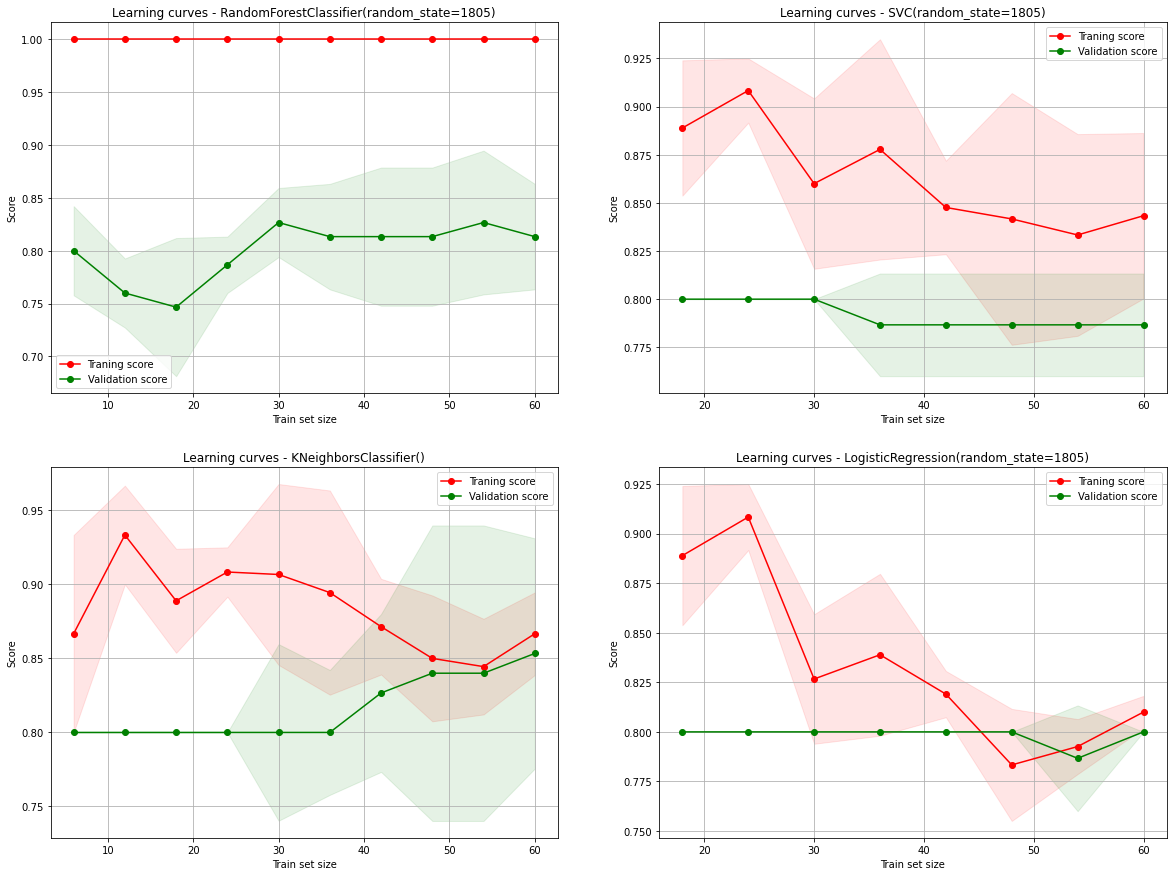

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.99,0.79,0.88,-0.02,Overfitting :0.2,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 10, 'gamma': 1, 'kernel': 'poly'}",0.95,0.79,0.87,0.10,Overfitting :0.17,too much complex
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.87,0.74,0.85,-0.26,Overfitting :0.15,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.88,0.79,0.88,-0.02,Overfitting :0.1,too much complex


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,6,7
1.0,3,3


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.67      0.46      0.55        13
         1.0       0.30      0.50      0.37         6

    accuracy                           0.47        19
   macro avg       0.48      0.48      0.46        19
weighted avg       0.55      0.47      0.49        19

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,7,6
1.0,2,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.54      0.64        13
         1.0       0.40      0.67      0.50         6

    accuracy                           0.58        19
   macro avg       0.59      0.60      0.57        19
weighted avg       0.66      0.58      0.59        19

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,7,6
1.0,3,3


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.54      0.61        13
         1.0       0.33      0.50      0.40         6

    accuracy                           0.53        19
   macro avg       0.52      0.52      0.50        19
weighted avg       0.58      0.53      0.54        19

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,5
1.0,2,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.62      0.70        13
         1.0       0.44      0.67      0.53         6

    accuracy                           0.63        19
   macro avg       0.62      0.64      0.61        19
weighted avg       0.69      0.63      0.64        19

************************************



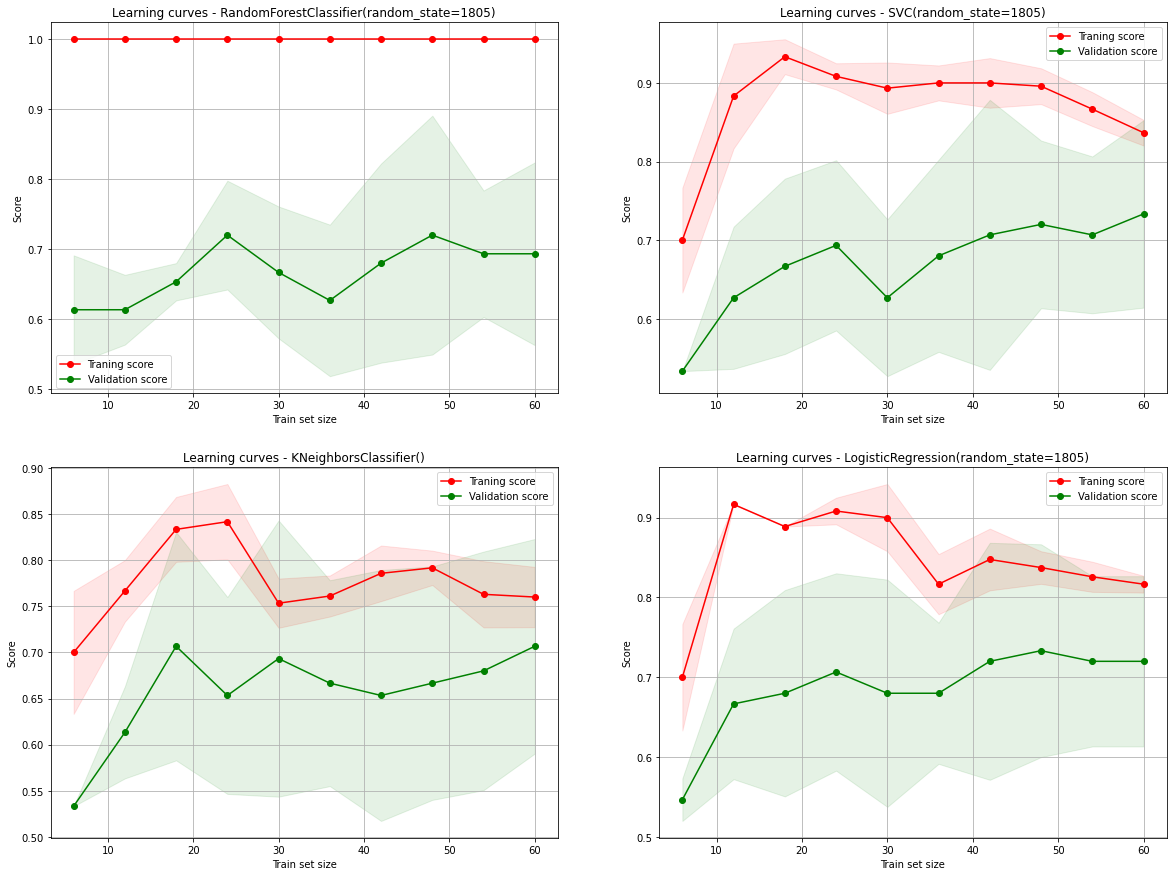

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",1.00,0.47,0.37,-0.39,Overfitting :0.53,too much complex
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",0.91,0.58,0.50,-0.20,Overfitting :0.36,too much complex
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.72,0.53,0.40,-0.31,Overfitting :0.26,too much complex
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.81,0.63,0.53,-0.10,Overfitting :0.22,too much complex


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,3,8
1.0,5,3


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.38      0.27      0.32        11
         1.0       0.27      0.38      0.32         8

    accuracy                           0.32        19
   macro avg       0.32      0.32      0.32        19
weighted avg       0.33      0.32      0.32        19

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,7,4
1.0,6,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.54      0.64      0.58        11
         1.0       0.33      0.25      0.29         8

    accuracy                           0.47        19
   macro avg       0.44      0.44      0.43        19
weighted avg       0.45      0.47      0.46        19

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,3
1.0,6,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.57      0.73      0.64        11
         1.0       0.40      0.25      0.31         8

    accuracy                           0.53        19
   macro avg       0.49      0.49      0.47        19
weighted avg       0.50      0.53      0.50        19

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,7,4
1.0,6,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.54      0.64      0.58        11
         1.0       0.33      0.25      0.29         8

    accuracy                           0.47        19
   macro avg       0.44      0.44      0.43        19
weighted avg       0.45      0.47      0.46        19

************************************



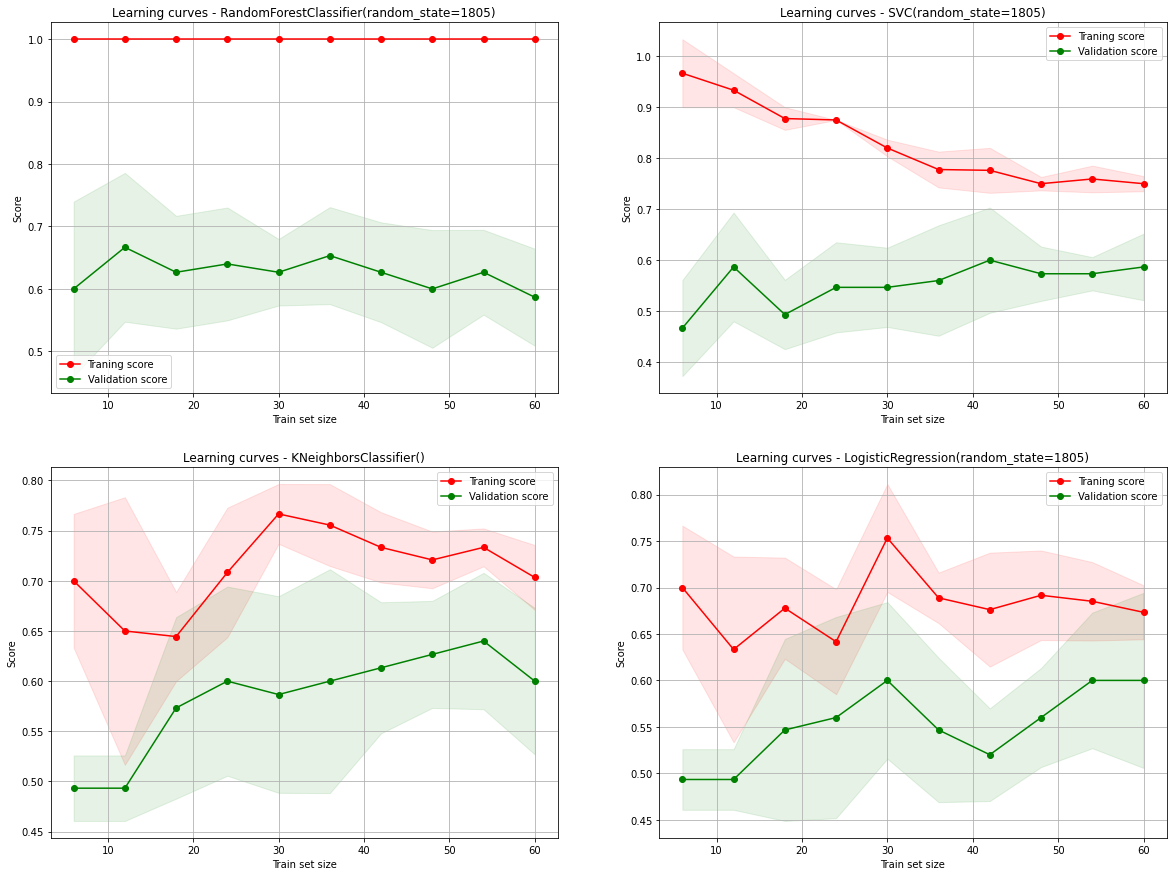

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.93,0.32,0.32,-0.62,Overfitting :0.66,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.68,0.47,0.29,-0.42,Overfitting :0.31,too much complex
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}",0.69,0.53,0.31,-0.35,Overfitting :0.23,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.72,0.47,0.29,-0.42,Overfitting :0.35,too much complex


In [16]:
predict(X_lane_encoded,y_lane, method = 'classification')

### Resampling dataset (create new samples)

In [17]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_encoded,y_lane,n_samples_created=1000)

In [18]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_resampled,y_lane_resampled, _sampling_strategy='auto')

TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,199,2
1.0,3,196


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       201
         1.0       0.99      0.98      0.99       199

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,201,0
1.0,0,199


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       201
         1.0       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,200,1
1.0,3,196


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       201
         1.0       0.99      0.98      0.99       199

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,166,35
1.0,25,174


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       201
         1.0       0.83      0.87      0.85       199

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

************************************



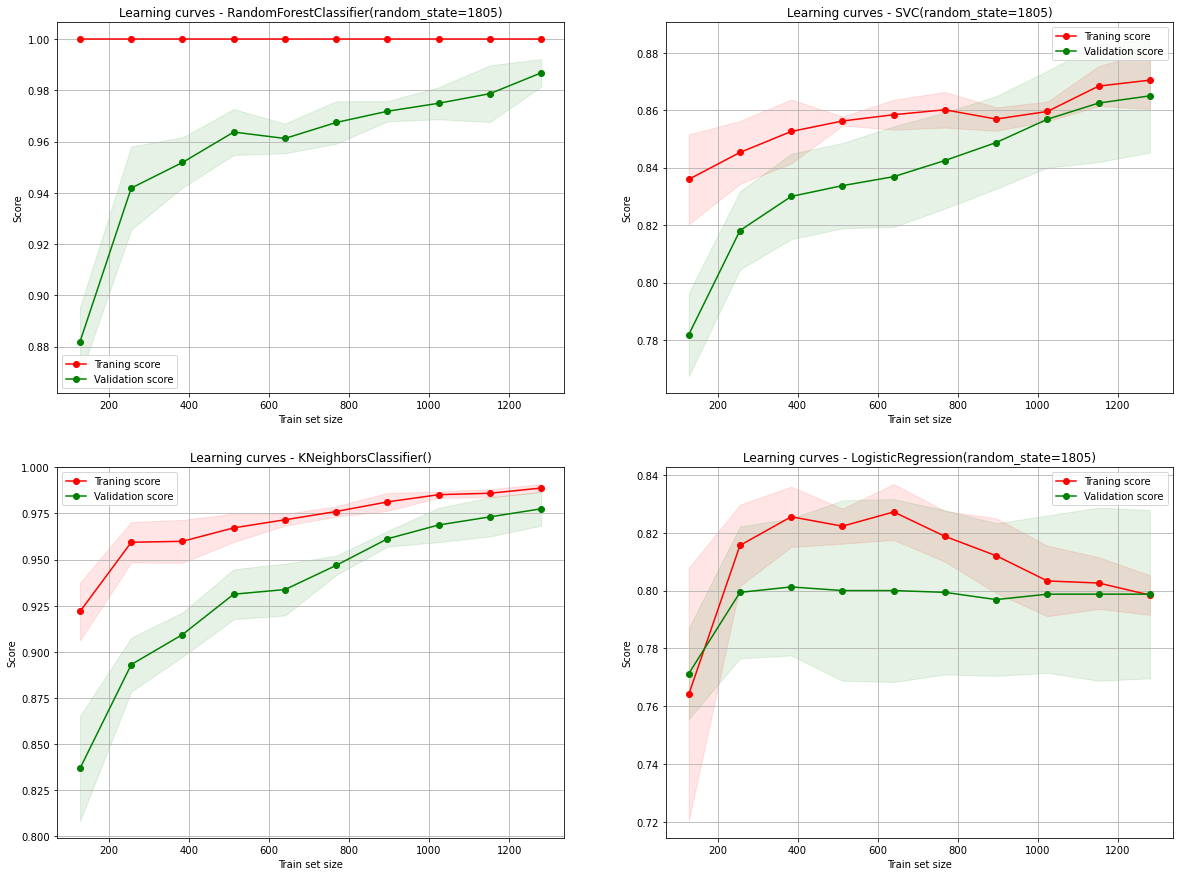

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",1.00,0.99,0.99,0.95,Overfitting :0.01,not complexe enough
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'poly'}",1.00,1.00,1.00,1.00,Overfitting :0.0,not complexe enough
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",1.00,0.99,0.99,0.96,Overfitting :0.01,not complexe enough
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.84,0.85,0.85,0.48,Underfitting :-0.01,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,201,4
1.0,1,194


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       205
         1.0       0.98      0.99      0.99       195

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,204,1
1.0,0,195


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       205
         1.0       0.99      1.00      1.00       195

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,205,0
1.0,2,193


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       205
         1.0       1.00      0.99      0.99       195

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,175,30
1.0,20,175


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88       205
         1.0       0.85      0.90      0.88       195

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

************************************



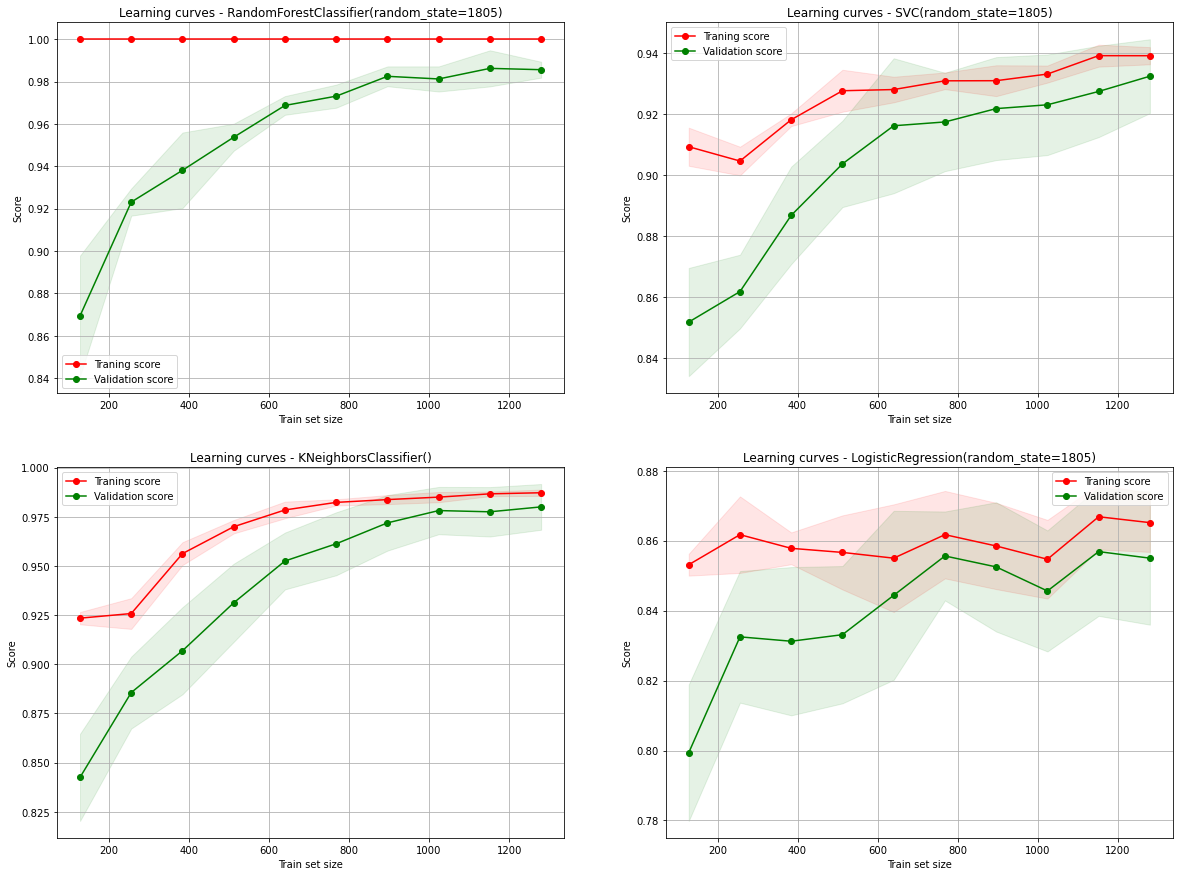

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",1.00,0.99,0.99,0.95,Overfitting :0.01,not complexe enough
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",1.00,1.00,1.00,0.99,Overfitting :0.0,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.00,1.00,0.99,0.98,Overfitting :0.0,not complexe enough
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.89,0.88,0.88,0.56,Overfitting :0.01,not complexe enough


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,206,0
1.0,12,182


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       206
         1.0       1.00      0.94      0.97       194

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,205,1
1.0,0,194


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       206
         1.0       0.99      1.00      1.00       194

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,204,2
1.0,7,187


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       206
         1.0       0.99      0.96      0.98       194

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,150,56
1.0,70,124


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       206
         1.0       0.69      0.64      0.66       194

    accuracy                           0.69       400
   macro avg       0.69      0.68      0.68       400
weighted avg       0.69      0.69      0.68       400

************************************



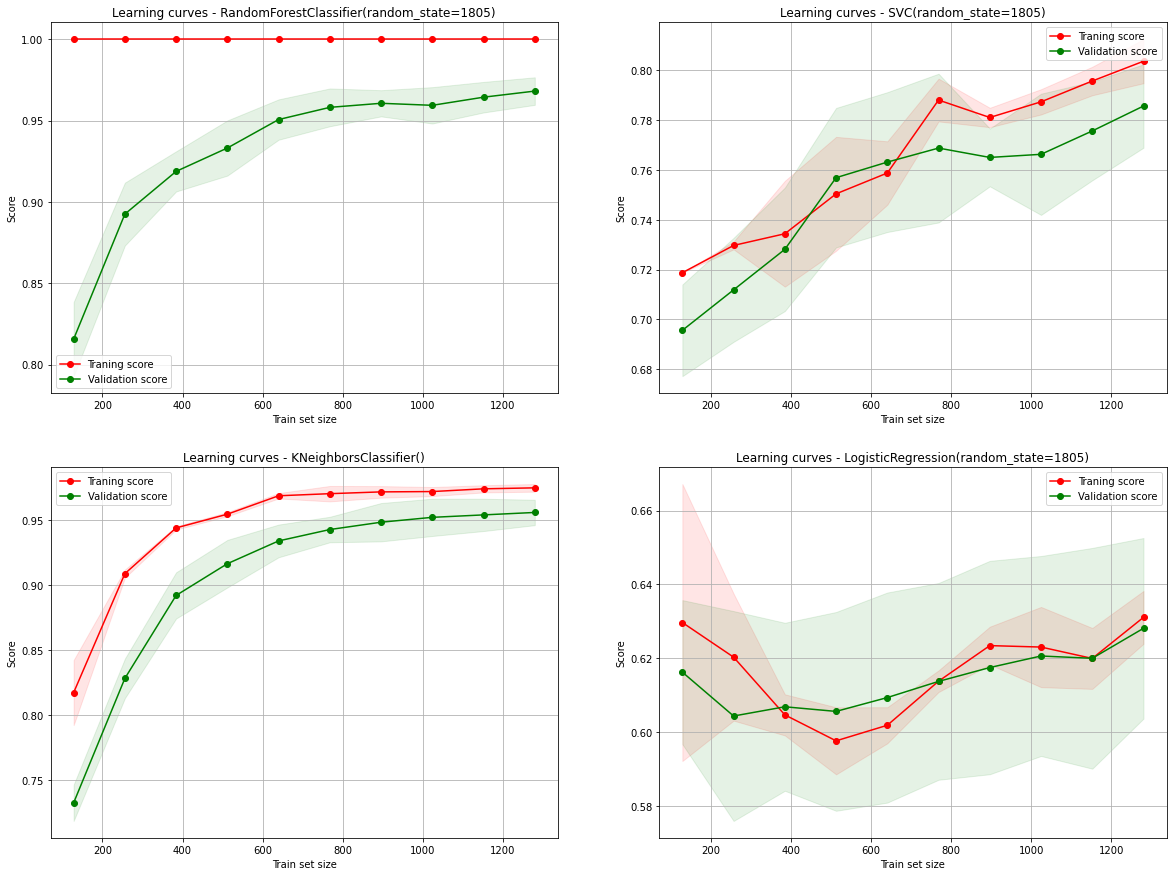

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",1.0,0.97,0.97,0.88,Overfitting :0.03,not complexe enough
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'poly'}",1.0,1.00,1.00,0.99,Overfitting :0.0,not complexe enough
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.0,0.98,0.98,0.91,Overfitting :0.02,not complexe enough
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.7,0.68,0.66,0.04,Overfitting :0.03,not complexe enough


In [19]:
predict(X_lane_resampled,y_lane_resampled, method = 'classification')

### TAKE-OVER WITHOUT CHANGING LANE

In [20]:
X_no_lane_reduced, no_lane_pvalues = discriminate_target_association(X_no_lane,y_no_lane)

In [21]:
no_lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,...,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.011,0.047,0.095,0.002,0.0,0.0,0.011,0.006,0.0,0.001,0.0,0.992,0.992,0.141,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.002,0.01,0.005,0.021,0.003,0.031,0.002,0.02,0.001,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.003,0.0,0.001,0.0,0.001,0.0,0.0,0.0,0.0,0.087,0.0,0.0,0.0,0.001,0.0,0.001,0.0,0.0,0.0,0.0,0.002,0.001,0.001,0.112,...,0.006,0.0,0.001,0.0,0.992,0.992,0.141,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.002,0.01,0.005,0.021,0.003,0.031,0.002,0.02,0.001,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.003,0.0,0.001,0.0,0.001,0.0,0.0,0.0,0.0,0.087,0.0,0.0,0.0,0.001,0.0,0.001,0.0,0.0,0.0,0.0,0.002,0.001,0.001,0.112,0.15,0.183,0.0,0.016,0.112,0.0,0.0,0.0,0.0,0.001,0.0,0.001,0.0,0.0
TOQ (Coll a/o ILC),0.19,0.129,0.162,0.049,0.087,0.312,0.008,0.888,0.176,0.18,0.78,0.458,0.574,0.552,0.205,0.457,0.941,0.808,0.226,0.225,0.202,0.72,0.637,0.619,0.597,0.561,0.607,0.543,0.576,0.345,0.883,0.545,0.685,0.795,0.683,0.626,0.714,0.478,0.573,0.448,0.54,0.977,0.945,0.967,0.979,0.953,0.961,0.763,0.89,0.842,0.905,0.789,0.11,0.544,0.642,0.57,0.686,0.642,0.991,0.642,0.9,0.744,0.923,0.986,0.87,0.956,0.831,0.869,0.897,0.857,0.55,0.478,0.652,0.414,0.082,...,0.205,0.457,0.941,0.808,0.226,0.225,0.202,0.72,0.637,0.619,0.597,0.561,0.607,0.543,0.576,0.345,0.883,0.545,0.685,0.795,0.683,0.626,0.714,0.478

In [22]:
for key in y_no_lane:
    display(pd.DataFrame(no_lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o ILC)
NDRT solicitation gaze,0.008
NDRT solicitation gaze,0.008
ID NDRT,0.049
ID NDRT,0.049
FRONTAL THETA/BETA,0.082
FRONTAL THETA/BETA,0.082
NDRT duration (s),0.087
NDRT duration (s),0.087
Mean \ndispersion fixations (pixel),0.094
Mean \ndispersion fixations (pixel),0.094


In [23]:
X_no_lane_encoded = encoding_one_hot(X_no_lane_reduced)
list(X_no_lane_encoded.values())[0]

,ID NDRT_1,ID NDRT_2,ID NDRT_3,ID NDRT_4,ID NDRT_5,ID NDRT_6,NDRT solicitation gaze_0,NDRT solicitation gaze_1,NDRT solicitation gaze_2
1,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,1,0
8,0,0,0,0,0,1,0,1,0
9,0,1,0,0,0,0,0,0,1
15,0,1,0,0,0,0,0,0,1
19,0,0,0,0,0,1,0,1,0
20,1,0,0,0,0,0,1,0,0
23,0,0,0,1,0,0,0,1,0
27,0,1,0,0,0,0,0,0,1
31,0,0,0,0,0,1,0,1,0


In [24]:
for k in X_no_lane_encoded:
    X_no_lane_encoded[k] = X_no_lane_encoded[k].astype(int)

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,5,1
1.0,1,3


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0
Real class,
0.0,6
1.0,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         6
         1.0       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0
Real class,
0.0,6
1.0,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         6
         1.0       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0
Real class,
0.0,6
1.0,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         6
         1.0       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10

************************************



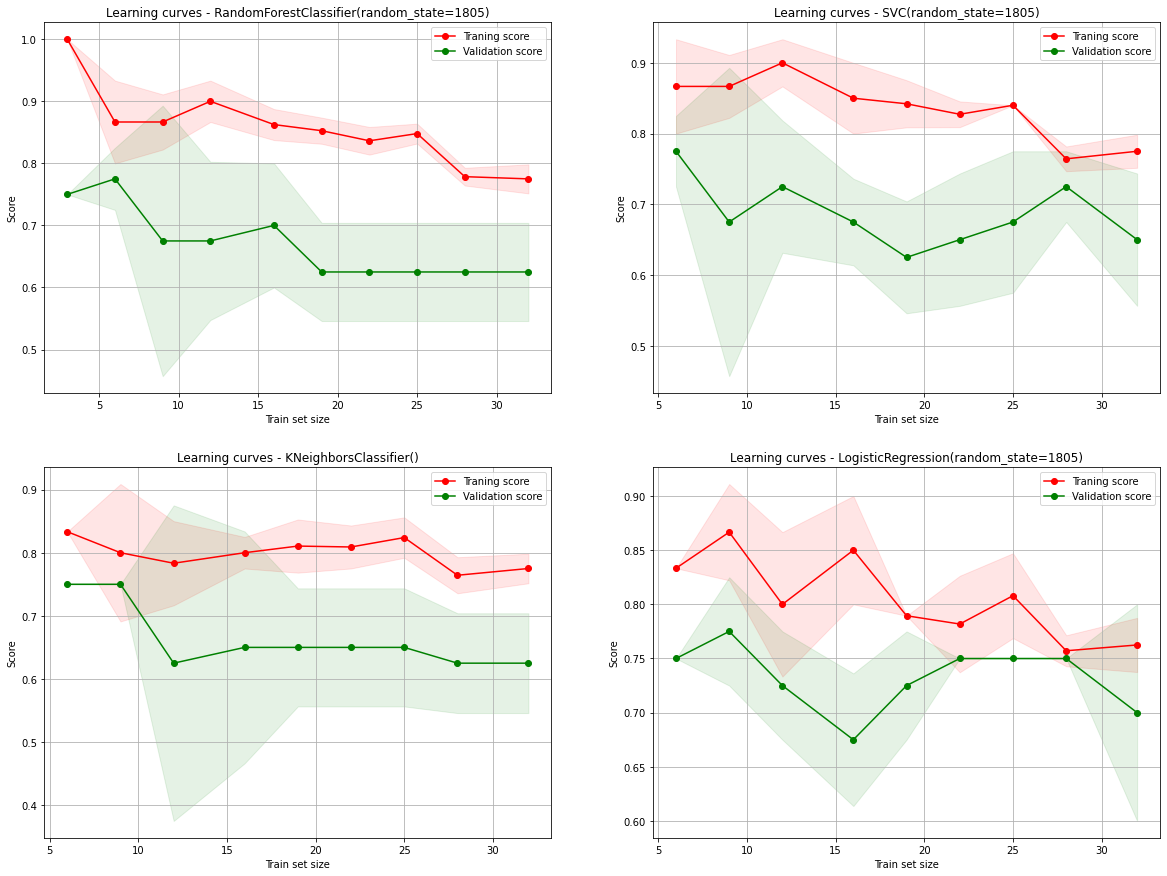

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.75,0.8,0.75,0.31,Underfitting :-0.07,too much complex
1,TOQ (Coll a/o ILC),SVC,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.75,0.6,0.00,-0.40,Overfitting :0.2,too much complex
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.75,0.6,0.00,-0.40,Overfitting :0.2,too much complex
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.75,0.6,0.00,-0.40,Overfitting :0.2,too much complex


In [25]:
predict(X_no_lane_encoded,y_no_lane, method = 'classification')

### Resampling dataset (create new samples)

In [26]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_encoded,y_no_lane,n_samples_created=200)

In [27]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_resampled,y_no_lane_resampled, _sampling_strategy='auto')

In [28]:
X_no_lane_resampled

{'TOQ (Coll a/o  ILC)':      ID NDRT_1  ID NDRT_2  ID NDRT_3  ID NDRT_4  ID NDRT_5  ID NDRT_6  \
 0            0          1          0          0          0          0   
 1            0          0          0          0          0          1   
 2            0          0          0          0          0          1   
 3            0          1          0          0          0          0   
 4            0          1          0          0          0          0   
 ..         ...        ...        ...        ...        ...        ...   
 395          0          0          0          0          0          1   
 396          0          0          0          0          0          0   
 397          0          0          0          0          0          1   
 398          0          0          0          0          0          1   
 399          0          0          0          0          0          0   
 
      NDRT solicitation gaze_0  NDRT solicitation gaze_1  \
 0                         

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,24,9
1.0,0,47


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84        33
         1.0       0.84      1.00      0.91        47

    accuracy                           0.89        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.89      0.88        80

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,23,10
1.0,0,47


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82        33
         1.0       0.82      1.00      0.90        47

    accuracy                           0.88        80
   macro avg       0.91      0.85      0.86        80
weighted avg       0.90      0.88      0.87        80

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,24,9
1.0,0,47


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84        33
         1.0       0.84      1.00      0.91        47

    accuracy                           0.89        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.89      0.88        80

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,23,10
1.0,0,47


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82        33
         1.0       0.82      1.00      0.90        47

    accuracy                           0.88        80
   macro avg       0.91      0.85      0.86        80
weighted avg       0.90      0.88      0.87        80

************************************



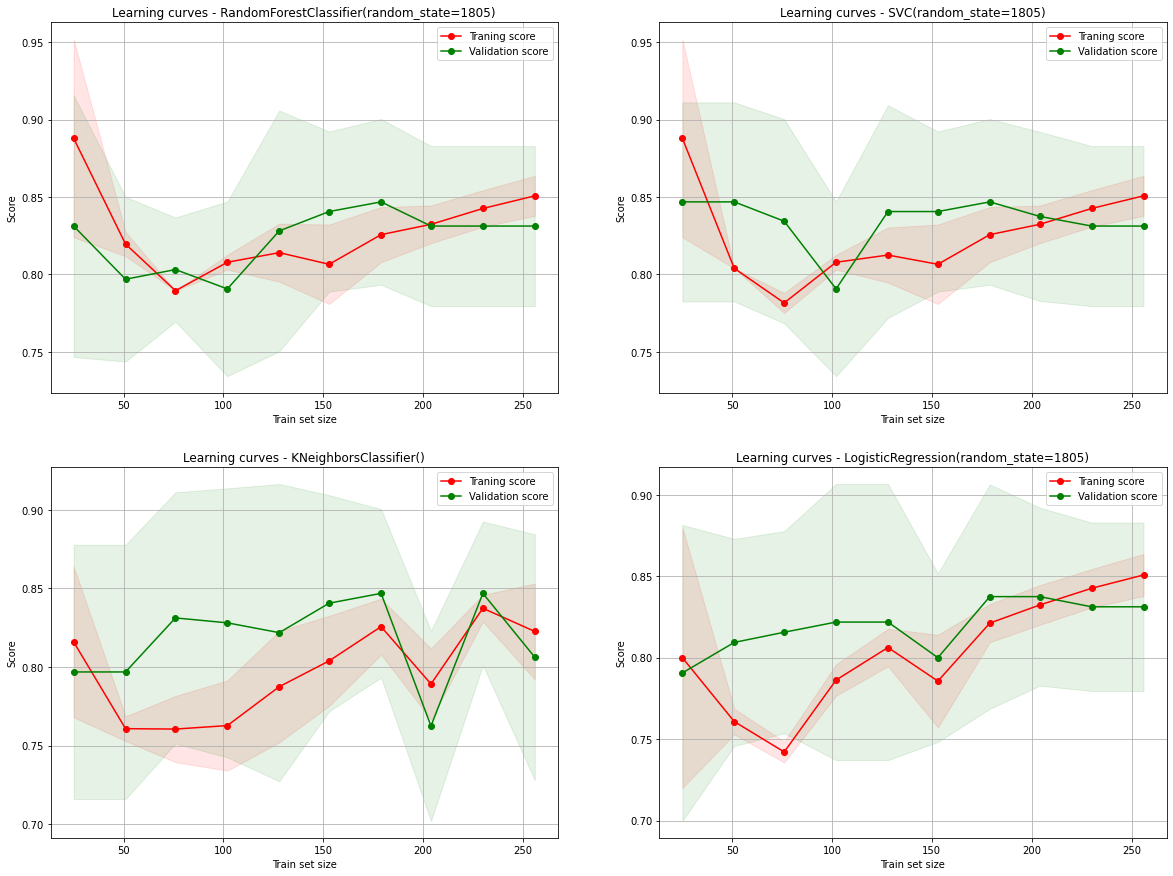

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.85,0.89,0.91,0.57,Underfitting :-0.05,not complexe enough
1,TOQ (Coll a/o ILC),SVC,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}",0.85,0.88,0.90,0.52,Underfitting :-0.04,not complexe enough
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.85,0.89,0.91,0.57,Underfitting :-0.05,not complexe enough
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.85,0.88,0.90,0.52,Underfitting :-0.04,not complexe enough


In [29]:
predict(X_no_lane_resampled,y_no_lane_resampled, method = 'classification')

### TAKE-OVER TIME

In [30]:
X_TOT_reduced, TOT_pvalues = discriminate_target_association(X_TOT,y_TOT)

In [31]:
X_TOT_encoded = encoding_one_hot(X_TOT_reduced)
list(X_TOT_encoded.values())[0]

,FRONTAL THETA/BETA
0,0.612391
1,0.792634
2,0.602250
3,0.497188
4,0.699614
...,...
150,0.860301
151,0.806020
152,0.510368
153,0.807490


In [32]:
list(X_TOT_reduced.values())[0]

,FRONTAL THETA/BETA
0,0.612391
1,0.792634
2,0.602250
3,0.497188
4,0.699614
...,...
150,0.860301
151,0.806020
152,0.510368
153,0.807490


In [33]:
TOT_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,...,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.023,0.108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.841,0.738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,...,0.0,0.0,0.0,0.0,0.841,0.738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.004,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOT (s),0.195,0.577,0.306,0.331,0.214,0.152,0.441,0.577,0.162,0.162,0.438,0.61,0.348,0.578,0.824,0.611,0.431,0.588,0.367,0.367,0.4,0.758,0.548,0.654,0.794,0.815,0.78,0.51,0.899,0.871,0.733,0.512,0.286,0.248,0.508,0.429,0.581,0.571,0.44,0.627,0.662,0.826,0.64,0.394,0.479,0.675,0.366,0.997,0.81,0.944,0.93,0.158,0.435,0.659,0.627,0.603,0.62,0.352,0.801,0.302,0.527,0.695,0.692,0.68,0.689,0.705,0.68,0.72,0.736,0.714,0.677,0.47,0.358,0.54,0.034,...,0.824,0.611,0.431,0.588,0.367,0.367,0.4,0.758,0.548,0.654,0.794,0.815,0.78,0.51,0.899,0.871,0.733,0.512,0.286,0.248,0.508,0.429,0.581,0.571,0.44,0.627,0.662,0.826,0.64,0.394,0.479,0.675,0.366,0.997,0.81,0.944,0.93,0.158,0.435,0.659,0.627,0.603,0.62,0.352,0.801,0.302

In [34]:
for key in y_TOT:
    display(pd.DataFrame(TOT_pvalues.T[key].sort_values()[:10]))

,TOT (s)
FRONTAL THETA/BETA,0.034
FRONTAL THETA/BETA,0.034
Mean deceleration \nsaccade (pixel/s²),0.149
Mean deceleration \nsaccade (pixel/s²),0.149
Mean velocity variation saccade (pixel/s²),0.151
Mean velocity variation saccade (pixel/s²),0.151
NDRT solicitation hands,0.152
NDRT solicitation hands,0.152
Pz TOTAL BAND 1-50Hz,0.158
Pz TOTAL BAND 1-50Hz,0.158


TOT (s)



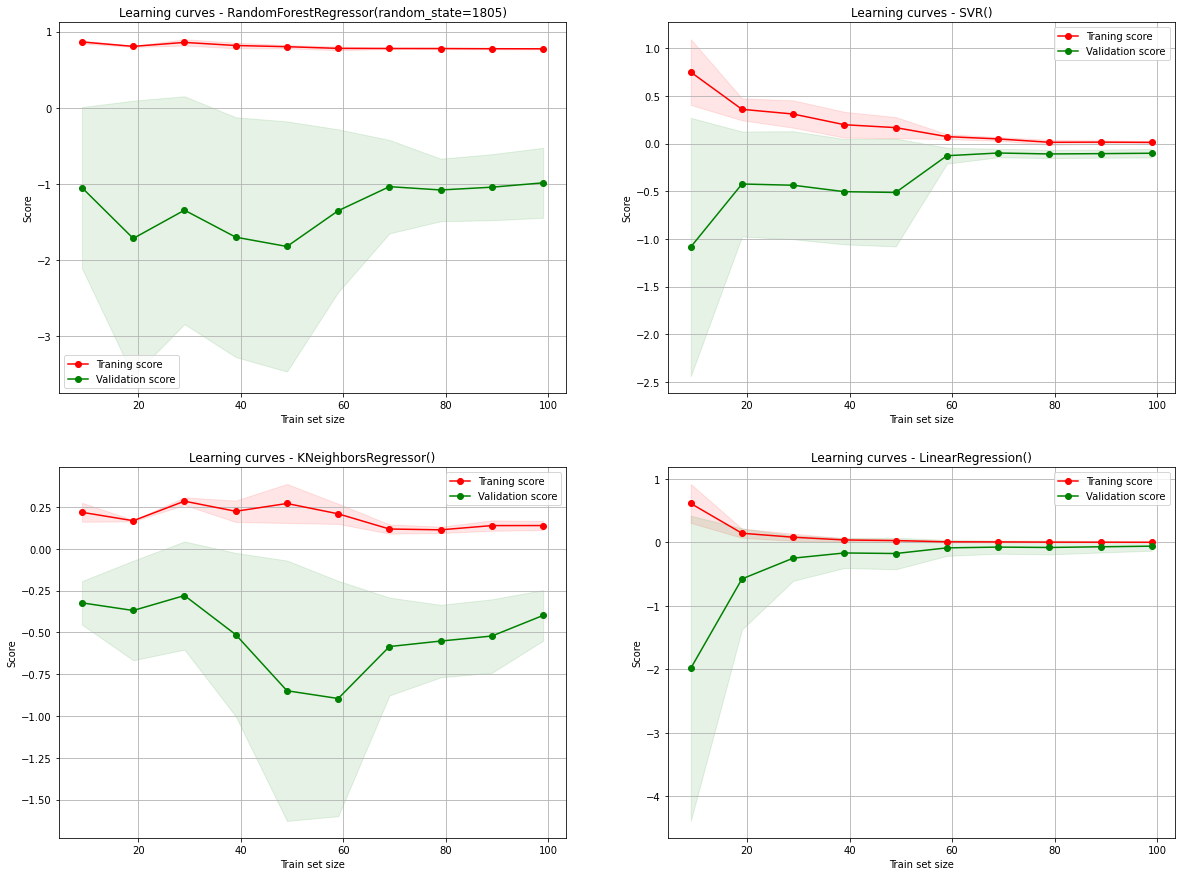

,target,model,hyperparameters,grid_score_train,grid_score_test,mse,mae,rmse,mean_error (s),fitting,complexity
0,TOT (s),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.45,-0.22,0.055,0.124,0.235,0.124,Overfitting :1.49,too much complex
1,TOT (s),SVR,"{'C': 0.1, 'gamma': 10, 'kernel': 'sigmoid'}",-0.03,-0.03,0.046,0.101,0.215,0.101,Overfitting :-0.0,not complexe enough
2,TOT (s),KNN Regressor,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.01,-0.05,0.047,0.115,0.217,0.115,Overfitting :6.0,too much complex
3,TOT (s),Linear Regression,{},0.00,0.00,0.045,0.114,0.212,0.114,Overfitting :nan,not complexe enough


In [35]:
predict(X_TOT_encoded,y_TOT, method = 'regression')